In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:

# Carregar os dados do arquivo CSV
df_train = pd.read_csv('dados/train.csv')
df_test = pd.read_csv('dados/test.csv')

# Agora 'df' é um DataFrame que contém seu dataset
print(df_train.head())  # Exibe a primeira linha do DataFrame
print(df_test.head(0))  # Exibe a primeira linha do DataFrame


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
Em

In [85]:
# verificando a porcentagem de sobrevivencia de mulheres e homens
sleep = df_train.loc[df_train.CryoSleep == True]["Transported"]
rate_sleep = sum(sleep)/len(sleep)

print("chance de sobrevivência dos que tiveram suspensão criogênica", rate_sleep)

nsleep = df_train.loc[df_train.CryoSleep == False]["Transported"]
rate_nsleep = sum(nsleep)/len(nsleep)

print("chance de sobrevivência dos que não tiveram suspensão criogênica:", rate_nsleep)

# verificando a porcentagem de sobrevivencia de mulheres e homens
VIP = df_train.loc[df_train.VIP == True]["Transported"]
rate_sleep = sum(VIP)/len(VIP)

print("chance de sobrevivência dos que pagaram por serviço vip", rate_sleep)

nVIP = df_train.loc[df_train.VIP == False]["Transported"]
rate_nVIP = sum(nVIP)/len(nVIP)

print("chance de sobrevivência dos que não pagaram por serviço vip:", rate_nsleep)

chance de sobrevivência dos que tiveram suspensão criogênica 0.8175831412578202
chance de sobrevivência dos que não tiveram suspensão criogênica: 0.3289207574921861
chance de sobrevivência dos que pagaram por serviço vip 0.38190954773869346
chance de sobrevivência dos que não pagaram por serviço vip: 0.3289207574921861


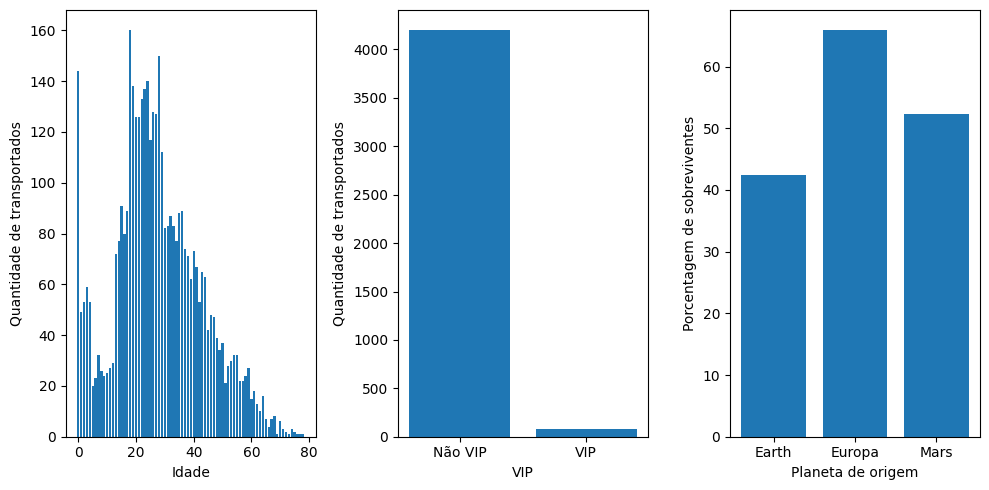

In [86]:
import matplotlib.pyplot as plt


# Calcule a quantidade de pessoas que sobreviveram em cada idade
sobreviventes_por_idade = df_train[df_train['Transported'] == True]['Age'].value_counts().sort_index()
sobreviventes_Vip = df_train[df_train['Transported'] == True]['VIP'].value_counts().sort_index()
totalPorPlaneta = df_train['HomePlanet'].value_counts()
transportadosPorPlaneta = df_train[df_train['Transported'] == True]['HomePlanet'].value_counts().sort_index()

# Crie uma figura e um conjunto de subtramas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Crie um gráfico de barras com 'idade' no eixo x e a quantidade de sobreviventes no eixo y
axs[0].bar(sobreviventes_por_idade.index, sobreviventes_por_idade.values)

# Defina os rótulos dos eixos
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Quantidade de transportados')


axs[1].bar(sobreviventes_Vip.index, sobreviventes_Vip.values)
axs[1].set_xlabel('VIP')
axs[1].set_ylabel('Quantidade de transportados')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Não VIP', 'VIP'])

axs[2].bar(transportados.index, (transportados/total)*100)
axs[2].set_ylabel('Porcentagem de sobreviventes')
axs[2].set_xlabel('Planeta de origem')

# Mostre os gráficos
plt.tight_layout()
plt.show()


In [87]:
# remove as colunas que não serão utilizadas 
df_train = df_train.drop(['Name', 'Cabin', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet'], axis=1)
df_test = df_test.drop(['Name', 'Cabin', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet'], axis=1)

In [88]:
# divisão do dataset de treino em X_train e y_train
X_train = df_train.drop('Transported', axis=1) 
y_train = df_train['Transported'] 


In [89]:
print(X_train.head(0))

Empty DataFrame
Columns: [PassengerId, CryoSleep, Age, VIP]
Index: []


In [90]:
# criação do metodo de classificação
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=24)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=24)

In [91]:
# previsão dos dados de teste
y_pred = clf.predict(df_test)

[ True False  True ...  True False  True]


In [94]:
#gerando arquivo de submissão
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Transported': y_pred})
output.to_csv('submission.csv', index=False)